<a href="https://colab.research.google.com/github/rodoluca/aulas_dnc/blob/master/KingCounty_RealEstate_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


A Questão de Negócio:
- Qual a minha meta?
- Como posso chegar?

O Entendimento do Negócio:
- Quais dados eu tenho disponível?
- Eles são relevantes para o problema?
- Eles me trazem uma solução direta?
- Qual o meu setor ou range de negócio?

A Coleta de Dados:
- Os dados que eu tenho fazem sentido?
- Estão no formato que eu gostaria?
- O que mais eu consigo obter de informação destes dados?

A Limpeza de Dados:
- Remoção de dados outliers e valores ausentes

A Exploração de Dados:
- Visualização dos dados
- Quais as minhas métricas essenciais
- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.

Dicas de Insights
- Encontre a cidade de cada imóvel;
- Calcule o preço por área de imóvel;
- Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças?"

In [28]:
#Import data

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

properties_df = pd.read_csv(r"kc_house_data.csv")

#importar cidades
from uszipcode import SearchEngine

engine = SearchEngine()

properties_df["city"] = None

for i, row in properties_df.iterrows():
  zipcode = engine.by_zipcode(properties_df["zipcode"][i])
  properties_df["city"][i] = zipcode.major_city

properties_df.info()

properties_df = properties_df.drop(columns= ["zipcode","lat", "long"])

Exception ignored in: <function SearchEngine.__del__ at 0x7fddae3fa950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
properties_df["date"] = pd.to_datetime(properties_df["date"], format="%Y/%m/%d" )
properties_df["price/sqft_living"] = properties_df["price"] / properties_df["sqft_living"]
properties_df["price/sqft_lot"] = properties_df["price"] / properties_df["sqft_lot"]
# properties_df["ROI"] = properties_df["price"] / properties_df["sqft_lot15"]



display(properties_df.head(6))

print(properties_df.shape)
properties_df.nunique()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,1340,5650.0,Seattle,188.050847,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,1690,7639.0,Seattle,209.338521,74.288870
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,2720,8062.0,Kenmore,233.766234,18.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,1360,5000.0,Seattle,308.163265,120.800000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,1800,7503.0,Sammamish,303.571429,63.118812
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,4760,101930.0,Redmond,226.014760,12.018052


(17863, 21)


id                   17701
date                   368
price                 3422
bedrooms                13
bathrooms               29
sqft_living            802
sqft_lot              8475
floors                   6
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             726
sqft_basement          272
yr_built               116
yr_renovated            70
sqft_living15          635
sqft_lot15            7634
city                    24
price/sqft_living    13946
price/sqft_lot       16601
dtype: int64

In [6]:
pd.DataFrame(properties_df['condition'].value_counts().sort_index())



,condition
1,26
2,156
3,10987
4,5164
5,1530


In [7]:
pd.DataFrame(properties_df['grade'].value_counts().sort_index())

,grade
3,3
4,25
5,226
6,1846
7,7779
8,4755
9,1969
10,866
11,306
12,76


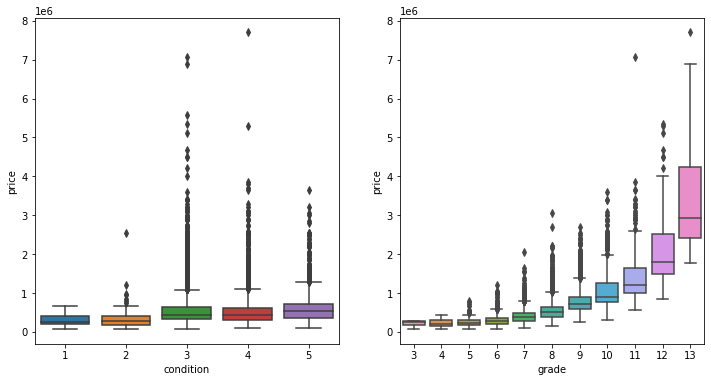

In [8]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
sns.boxplot(x='condition', y='price', data=properties_df);

plt.subplot(122)
sns.boxplot(x='grade', y='price', data=properties_df)

plt.show()

In [9]:

var_num = properties_df._get_numeric_data()

var_num.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650.0,188.050847,39.274336
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639.0,209.338521,74.288870
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062.0,233.766234,18.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000.0,308.163265,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503.0,303.571429,63.118812


In [10]:
#parametros basicos
var_num.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot
count,1.786300e+04,1.786300e+04,17863.000000,17863.000000,17863.000000,1.786300e+04,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000,17862.000000,17863.000000,17863.000000
mean,4.568664e+09,5.331175e+05,3.363769,2.062196,2052.734815,1.578496e+04,1.433382,0.007781,0.242121,3.448749,7.592398,1750.449197,302.285618,1967.311426,90.159772,1973.843419,13298.776173,263.901601,78.211789
std,2.862723e+09,3.642684e+05,0.933766,0.758052,902.502877,4.259372e+04,0.509523,0.087871,0.778656,0.667009,1.168946,805.515018,449.658697,27.941263,414.515312,673.390836,27428.394758,110.683215,78.397771
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,660.000000,87.647059,0.163119
25%,2.122870e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,1490.000000,5418.250000,181.801010,31.788905
50%,3.914000e+09,4.475000e+05,3.000000,2.000000,1900.000000,7.904000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,1830.000000,7820.000000,244.444444,54.182510
75%,7.292200e+09,6.370000e+05,4.000000,2.500000,2500.000000,1.108900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,2340.000000,10336.000000,317.757009,96.997746
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6110.000000,871200.000000,800.000000,2027.208539


In [11]:
correlacao_df = var_num.corr()
correlacao_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot
id,1.000000,-0.015286,0.002828,0.004583,-0.011791,-0.134967,0.015444,-0.002610,0.012910,-0.020417,0.007333,-0.011416,-0.003215,0.021962,-0.019017,-0.011198,-0.144303,-0.005043,0.066066
price,-0.015286,1.000000,0.302404,0.523181,0.701373,0.089162,0.280566,0.275631,0.403738,0.046364,0.662519,0.604913,0.324078,0.036974,0.137144,0.599460,0.079020,0.558326,0.369722
bedrooms,0.002828,0.302404,1.000000,0.518693,0.563397,0.029582,0.207969,-0.002432,0.083521,0.031733,0.357218,0.456730,0.312602,0.163033,0.023504,0.373048,0.025950,-0.192752,-0.009119
bathrooms,0.004583,0.523181,0.518693,1.000000,0.760961,0.092942,0.503491,0.075311,0.202665,-0.094786,0.659174,0.684523,0.301063,0.484513,0.068864,0.578734,0.093475,-0.096597,0.199710
sqft_living,-0.011791,0.701373,0.563397,0.760961,1.000000,0.171773,0.400100,0.115943,0.295003,-0.049007,0.767805,0.867406,0.453220,0.324596,0.067589,0.752918,0.183570,-0.086122,0.079082
sqft_lot,-0.134967,0.089162,0.029582,0.092942,0.171773,1.000000,0.022659,0.021375,0.069028,-0.020298,0.120677,0.188000,0.007981,0.082933,0.005613,0.154360,0.701027,-0.031663,-0.210074
floors,0.015444,0.280566,0.207969,0.503491,0.400100,0.022659,1.000000,0.034712,0.054345,-0.221231,0.463163,0.579972,-0.235923,0.416487,0.035143,0.327144,0.019350,-0.012933,0.400465
waterfront,-0.002610,0.275631,-0.002432,0.075311,0.115943,0.021375,0.034712,1.000000,0.399581,0.010148,0.090290,0.084441,0.081440,-0.016014,0.087755,0.091239,0.030107,0.188947,0.045709
view,0.012910,0.403738,0.083521,0.202665,0.295003,0.069028,0.054345,0.399581,1.000000,0.038176,0.262139,0.179030,0.271384,-0.037770,0.102238,0.291696,0.066384,0.219853,0.118253
condition,-0.020417,0.046364,0.031733,-0.094786,-0.049007,-0.020298,-0.221231,0.010148,0.038176,1.000000,-0.126277,-0.146416,0.163928,-0.315761,-0.074509,-0.090427,-0.016840,0.108232,-0.023960


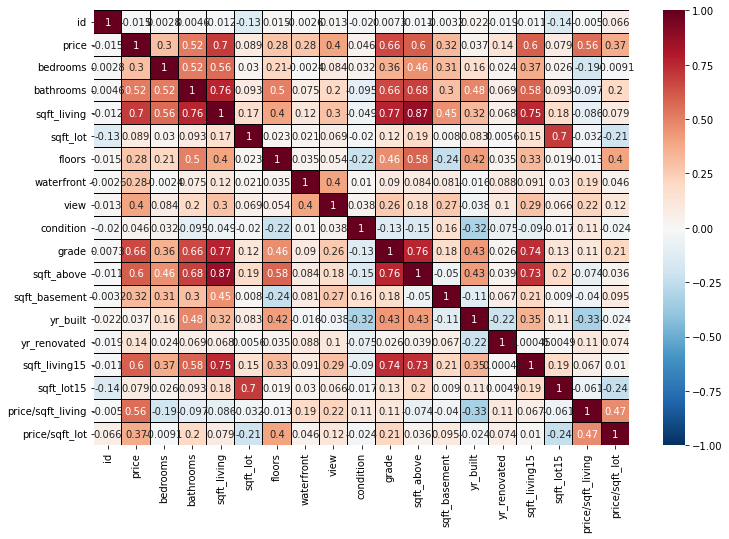

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(correlacao_df, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)


In [13]:
correlacao_df['price'].sort_values(ascending=False).round(3)

price                1.000
sqft_living          0.701
grade                0.663
sqft_above           0.605
sqft_living15        0.599
price/sqft_living    0.558
bathrooms            0.523
view                 0.404
price/sqft_lot       0.370
sqft_basement        0.324
bedrooms             0.302
floors               0.281
waterfront           0.276
yr_renovated         0.137
sqft_lot             0.089
sqft_lot15           0.079
condition            0.046
yr_built             0.037
id                  -0.015
Name: price, dtype: float64

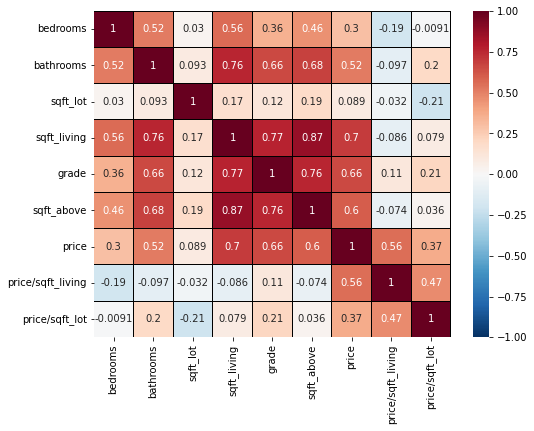

In [14]:
#Principais variaveis
cols = properties_df.filter(items="city",axis=0)
cols = properties_df[['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'grade', 'sqft_above','price', "price/sqft_living","price/sqft_lot"]]

most_corr_var = cols.corr()

plt.figure(figsize=[8, 6])
sns.heatmap(data=most_corr_var,vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

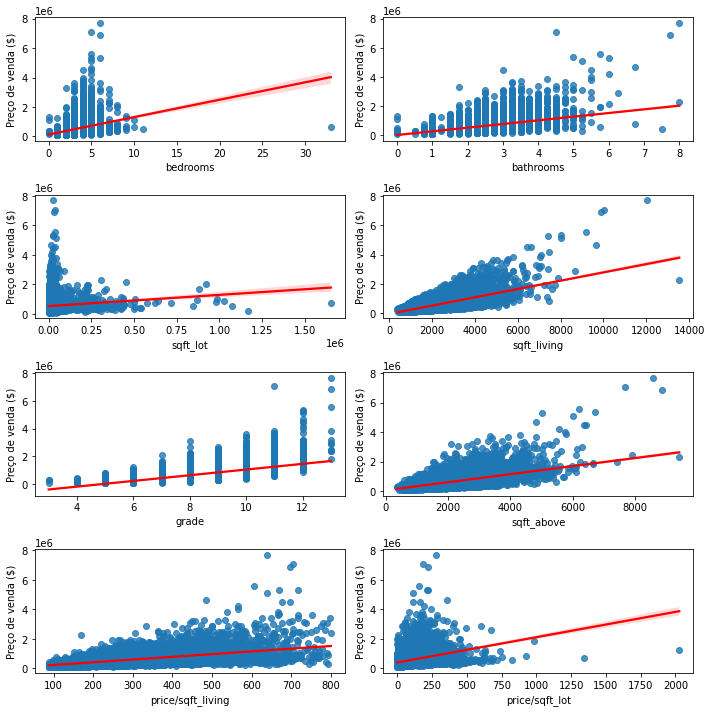

In [15]:
plt.figure(figsize=[10, 10])

i = 1

for col in cols:
    if col == 'price':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(properties_df[col], properties_df['price'], line_kws={'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('Preço de venda ($)')
    i+=1
    

plt.tight_layout()
plt.show()

In [16]:
#melhores cidades

melhores_cidades_df = properties_df[["city","date","price", "grade","condition", "price/sqft_lot", "price/sqft_living" ,"sqft_lot","sqft_living15", "sqft_lot15"]]

melhores_cidades_gb = melhores_cidades_df.groupby(by="city").agg(count=('city', 'size'), mean_price_sqft_lot=('price/sqft_lot', 'mean'),mean_grade=('grade', 'mean')) \
       .sort_values(['mean_price_sqft_lot',"mean_grade"], ascending = False).reset_index() #'mean_price_sqft_lot',"mean_grade"



print(melhores_cidades_gb.shape)

melhores_cidades_gb

(24, 4)


,city,count,mean_price_sqft_lot,mean_grade
0,Medina,39,119.988424,9.358974
1,Seattle,7368,112.882494,7.265744
2,Mercer Island,250,92.759865,8.928000
3,Issaquah,538,88.952129,8.265799
4,Bellevue,1226,77.897931,8.355628
5,Snoqualmie,197,74.989978,7.695431
6,Kirkland,827,74.595930,7.627570
7,Sammamish,675,70.827018,8.779259
8,Redmond,806,70.625310,8.198511
9,Bothell,162,54.047090,7.685185


In [17]:
# profit cidades

properties_duplicados = properties_df[properties_df.duplicated(subset=["id"], keep =False)].sort_values(["id","date"]).reset_index(drop=True)
list_id = properties_duplicados["id"].unique()


list_profit = []

for i in list_id:
  price_list = properties_duplicados[properties_duplicados["id"]== i ]["price"].to_list()
  profit = price_list[-1] - price_list[-2]
  list_profit.append(profit)

profit_df = properties_duplicados.drop_duplicates(subset = ["id"], keep ="last")
profit_df["profit"] = list_profit 

print(profit_df.shape)
#profit_df

(161, 22)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [18]:
# cidades com MAIOR e MENOR crescimento


profit_maior_df_gb = profit_df.groupby(by="city").agg(count=('city', 'size'), mean_profit=('profit', 'mean')) \
       .sort_values(['count',"mean_profit"], ascending = False).reset_index()

profit_maior_df_gb

,city,count,mean_profit
0,Seattle,80,176339.737500
1,Renton,17,101536.764706
2,Federal Way,11,85361.090909
3,Bellevue,9,85444.444444
4,Kent,8,104059.375000
5,Sammamish,7,164392.857143
6,Redmond,6,78630.833333
7,Auburn,5,83980.000000
8,Woodinville,3,86833.333333
9,Maple Valley,3,78333.333333


In [19]:
#Imoveis Seattle
seattle_df = properties_df[(properties_df["city"]=="Seattle")].reset_index()

seattle_df.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot
count,7368.000000,7.368000e+03,7.368000e+03,7368.000000,7368.00000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000
mean,8934.378122,4.594531e+09,5.345719e+05,3.184039,1.83883,1799.420331,6827.670060,1.376764,0.008686,0.318811,3.481135,7.265744,1434.129343,365.290988,1949.732899,134.093920,1696.158252,6510.647394,303.712807,112.882494
std,5137.186956,2.837221e+09,3.433898e+05,1.057492,0.78072,802.908087,5284.024962,0.522872,0.092800,0.878233,0.722101,1.002892,613.169580,436.218121,28.644179,499.717576,508.969475,4383.907796,116.878267,100.206977
min,0.000000,1.200019e+06,7.800000e+04,0.000000,0.00000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,460.000000,660.000000,87.647059,3.693920
25%,4358.500000,2.144801e+09,3.348125e+05,3.000000,1.00000,1230.000000,4190.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1030.000000,0.000000,1926.000000,0.000000,1350.000000,4320.000000,216.314665,44.629130
50%,8888.500000,4.024701e+09,4.505000e+05,3.000000,1.75000,1660.000000,6000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1300.000000,160.000000,1948.000000,0.000000,1600.000000,5940.000000,288.470280,82.292526
75%,13378.500000,7.228501e+09,6.325625e+05,4.000000,2.50000,2190.000000,8100.000000,1.500000,0.000000,0.000000,4.000000,8.000000,1670.000000,700.000000,1963.000000,0.000000,1930.000000,7928.500000,372.807018,148.010506
max,17861.000000,9.900000e+09,7.700000e+06,33.000000,8.00000,12050.000000,136915.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,3480.000000,2015.000000,2015.000000,4950.000000,128066.000000,798.122066,2027.208539


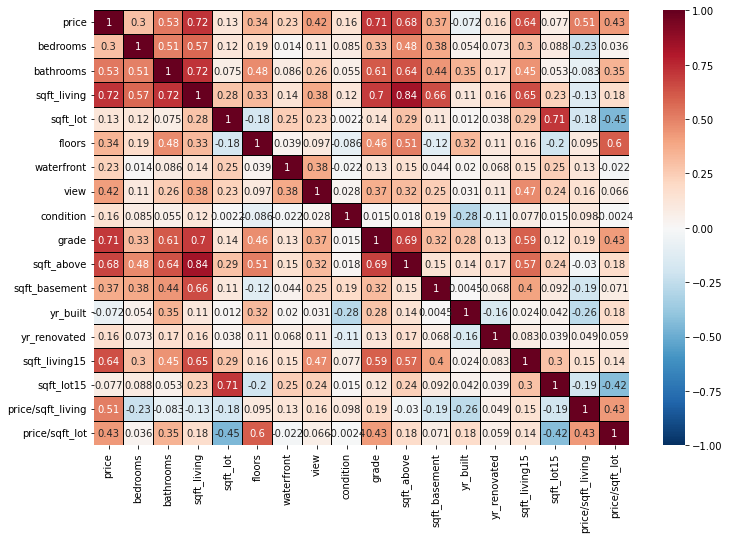

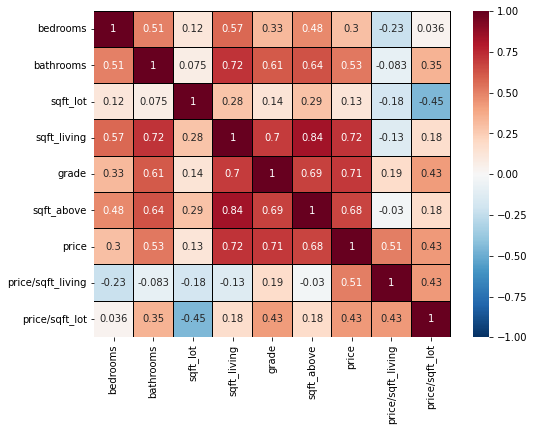

In [20]:
#Correlacao Seattle

var_num_seattle = seattle_df._get_numeric_data()

correlacao_seattle_df = var_num_seattle.drop(columns=["index","id"]).corr()
correlacao_seattle_df
plt.figure(figsize = (12,8))
sns.heatmap(correlacao_seattle_df, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

#Correlacao Seattle var mais importantes

cols_seattle = seattle_df[['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'grade', 'sqft_above','price', "price/sqft_living","price/sqft_lot"]]

most_seattle_corr_var = cols_seattle.corr()

plt.figure(figsize=[8, 6])
sns.heatmap(data=most_seattle_corr_var,vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

plt.show()

In [21]:
# #Correlacao Seattle Price
seattle_price_corr = correlacao_seattle_df["price"].sort_values(ascending = False)
seattle_price_corr

price                1.000000
sqft_living          0.720289
grade                0.707355
sqft_above           0.678832
sqft_living15        0.640963
bathrooms            0.527380
price/sqft_living    0.513627
price/sqft_lot       0.433990
view                 0.420391
sqft_basement        0.371572
floors               0.338426
bedrooms             0.304090
waterfront           0.233092
yr_renovated         0.164174
condition            0.155812
sqft_lot             0.127682
sqft_lot15           0.076588
yr_built            -0.071961
Name: price, dtype: float64

In [76]:
#Top 5 imóveis
seattle_top5_df = seattle_df.sort_values(['sqft_living'], ascending = False).sort_values(['price'], ascending = True)
top5 = seattle_top5_df[:5]
top5_list = top5[["id","price","sqft_living","price/sqft_living"]]

top5_list

,id,price,sqft_living,price/sqft_living
6327,40000362,78000.0,780,100.000000
6710,3028200080,81000.0,730,110.958904
3409,3883800011,82000.0,860,95.348837
851,1623049041,82500.0,520,158.653846
1569,1523049188,84000.0,700,120.000000


In [77]:
#Low 5 imóveis

seattle_low5_df = seattle_df.sort_values(['sqft_living'], ascending = True).sort_values(['price'], ascending = False)
low5 = seattle_low5_df[:5]

low5_list = low5[["id","price","sqft_living","price/sqft_living"]]

low5_list

,id,price,sqft_living,price/sqft_living
2966,6762700020,7700000.0,12050,639.004149
1025,7738500731,4500000.0,6640,677.710843
2683,4217402115,3650000.0,5480,666.058394
1115,4114601570,3600000.0,5020,717.131474
4314,1118000320,3400000.0,4260,798.122066


In [83]:
#Resposta

mean_price_seattle = seattle_df["price"].median()

mean_sqft_living_seattle = seattle_df["sqft_living"].median()


media_price_sqft_living = mean_price_seattle/mean_sqft_living_seattle

print(f"Preço médio: {mean_price_seattle}")
print(f"Area média construida: {mean_sqft_living_seattle}")
print(f"Preço médio por m²: {media_price_sqft_living}")
print(f"Top 5:\n{top5_list}")
print(f"Low 5:\n{low5_list}")


Preço médio: 450500.0
Area média construida: 1660.0
Preço médio por m²: 271.3855421686747
Top 5:
              id    price  sqft_living  price/sqft_living
6327    40000362  78000.0          780         100.000000
6710  3028200080  81000.0          730         110.958904
3409  3883800011  82000.0          860          95.348837
851   1623049041  82500.0          520         158.653846
1569  1523049188  84000.0          700         120.000000
Low 5:
              id      price  sqft_living  price/sqft_living
2966  6762700020  7700000.0        12050         639.004149
1025  7738500731  4500000.0         6640         677.710843
2683  4217402115  3650000.0         5480         666.058394
1115  4114601570  3600000.0         5020         717.131474
4314  1118000320  3400000.0         4260         798.122066
